## Descrição:
    
As a data scientist working for an investment firm, you will extract the revenue data for Tesla and GameStop and build a dashboard to compare the price of the stock vs the revenue. 
    
## Tarefas:

- Question 1 - Extracting Tesla Stock Data Using yfinance - 2 Points
- Question 2 - Extracting Tesla Revenue Data Using Webscraping - 1 Points
- Question 3 - Extracting GameStop Stock Data Using yfinance - 2 Points
- Question 4 - Extracting GameStop Revenue Data Using Webscraping - 1 Points
- Question 5 - Tesla Stock and Revenue Dashboard - 2 Points
- Question 6 - GameStop Stock and Revenue Dashboard- 2 Points
- Question 7 - Sharing your Assignment Notebook - 2 Points

In [55]:
# installing dependencies
!pip install yfinance pandas bs4

# importing modules
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# needed to cast datetime values
from datetime import datetime


### Question 1 - Extracting Tesla Stock Data Using yfinance

In [7]:
# making Ticker object
tesla_ticker = yf.Ticker("TSLA")

# creating a dataframe with history values
tesla_data = tesla_ticker.history(period="max")

# now we need to reset dataframe index and show first values
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


### Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [57]:
# getting TSLA revenue data from https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue
tesla_revenue_url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(tesla_revenue_url).text

# parsing html data
soup = BeautifulSoup(html_data,"html.parser")

# now we need to create a dataframe with columns "date" and "revenue", using data scrapped from soup
tesla_revenue_table = soup.find("table", class_="historical_data_table")

# now we will create an empty dataframe
tesla_revenue_data = pd.DataFrame(columns=["Date", "Revenue"])

# now we will loop through table and populate the dataframe
for row in tesla_revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        row_date = col[0].text
        row_date = datetime.strptime(row_date, '%Y')
        row_revenue = col[1].text
#       we need to strip "," and "$" chars from revenue value
        row_revenue = row_revenue.replace(",","").replace("$","")
        row_revenue = int(row_revenue)
        # printing var types
        # print(type(row_date), type(row_revenue) )
        tesla_revenue_data = tesla_revenue_data.append(
            {
                'Date': row_date,
                'Revenue': row_revenue
            }, ignore_index=True)


tesla_revenue_data.head()

,Date,Revenue
0,2020-01-01,31536
1,2019-01-01,24578
2,2018-01-01,21461
3,2017-01-01,11759
4,2016-01-01,7000


### Question 3 - Extracting GameStop Stock Data Using yfinance

In [35]:
# making Ticker object
gme_ticker = yf.Ticker("GME")

# creating a dataframe with history values
gme_data = gme_ticker.history(period="max")

# now we need to reset dataframe index and show first values
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766666,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733001,6.749833,6.632006,6.699336,2097400,0.0,0.0
3,2002-02-19,6.665671,6.665671,6.312189,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


### Question 4 - Extracting GameStop Revenue Data Using Webscraping

In [60]:
# getting GME revenue data from https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue
gme_revenue_url="https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data=requests.get(gme_revenue_url).text

# parsing html data
soup = BeautifulSoup(html_data,"html.parser")

# now we need to create a dataframe with columns "date" and "revenue", using data scrapped from soup
gme_revenue_table = soup.find("table", class_="historical_data_table")

# now we will create an empty dataframe
gme_revenue_data = pd.DataFrame(columns=["Date", "Revenue"])

# now we will loop through table and populate the dataframe
for row in gme_revenue_table.tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        row_date = col[0].text
        row_date = datetime.strptime(row_date, '%Y')
        row_revenue = col[1].text
#       we need to strip "," and "$" chars from revenue value
        row_revenue = row_revenue.replace(",","").replace("$","")
        row_revenue = int(row_revenue)
        # printing var types
        # print(type(row_date), type(row_revenue) )
        gme_revenue_data = gme_revenue_data.append(
            {
                'Date': row_date,
                'Revenue': row_revenue
            }, ignore_index=True)


gme_revenue_data.head()

,Date,Revenue
0,2021-01-01,5090
1,2020-01-01,6466
2,2019-01-01,8285
3,2018-01-01,8547
4,2017-01-01,7965


### Question 5 - Tesla Stock and Revenue Dashboard

<AxesSubplot:xlabel='Date'>

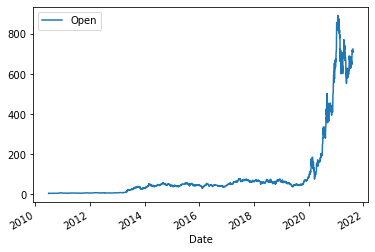

In [47]:
# plotting tesla stock data
tesla_data.plot(x="Date", y="Open")

<AxesSubplot:xlabel='Date'>

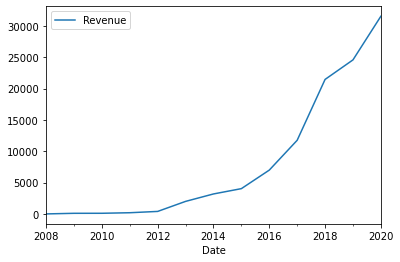

In [58]:
# plotting tesla revenue data
tesla_revenue_data.plot(x="Date", y="Revenue")

### Question 6 - GameStop Stock and Revenue Dashboard

<AxesSubplot:xlabel='Date'>

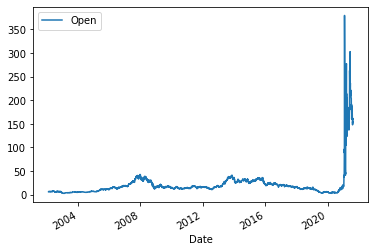

In [59]:
# plotting gamestop stock data
gme_data.plot(x="Date", y="Open")

<AxesSubplot:xlabel='Date'>

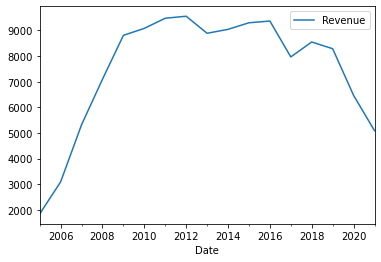

In [61]:
# plotting gamestop revenue data
gme_revenue_data.plot(x="Date", y="Revenue")